In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [42]:

df_data=pd.read_table('crystal_data.txt',sep=" ",skiprows=4)
print(df_data.iloc[:6,:])

   Generation         x         y     theta      psi       phi  lattice_sum  \
0           0  0.528347  0.346824  0.217212  1.35214  0.114110     0.611006   
1           0  0.412740  0.452940  0.300127  1.26834  0.122328     0.708208   
2           0  0.402787  0.319573  0.154269  1.41623  0.061931     1.417830   
3           0  0.725053  0.345543  1.138750  1.42178  0.542404     0.385249   
4           0  0.572701  0.624387  0.899353  1.26411  0.980570     0.246368   
5           0  0.231628  0.295399  0.132484  1.43825  0.030602     3.234720   

        fitness  
0  8.002610e-03  
1  3.166480e-03  
2  3.639250e-06  
3  6.893200e-02  
4  2.592560e-01  
5  1.083030e-13  


/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [43]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[99]['fitness'].max())

2.71827


In [44]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

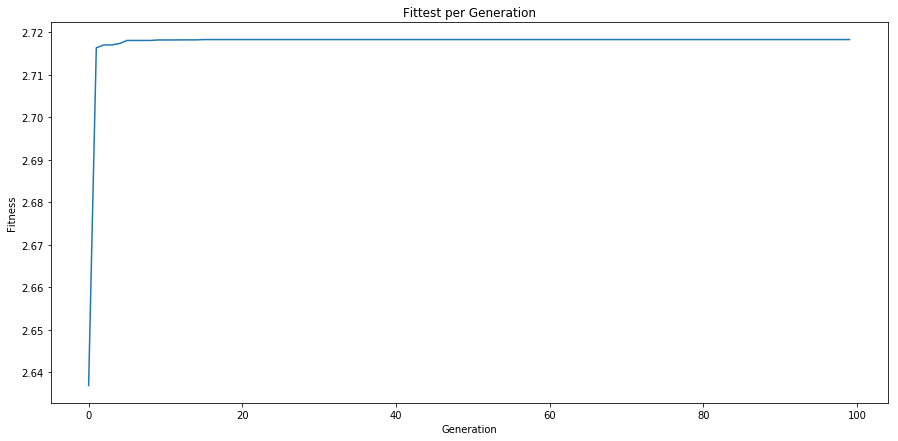

In [45]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest_crystal.png')

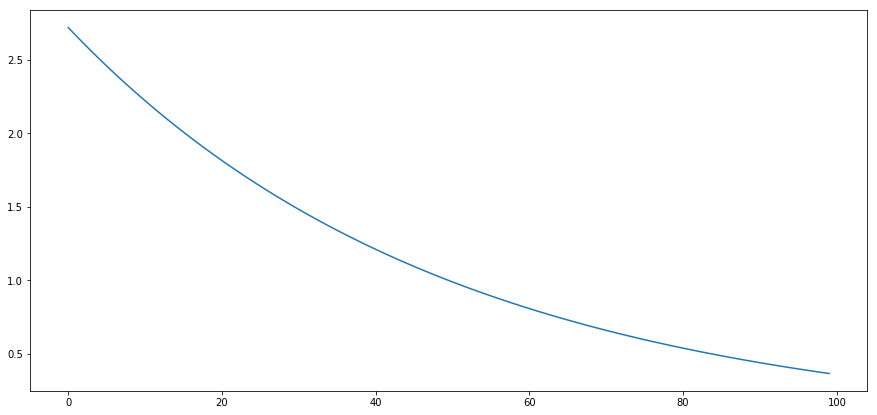

In [46]:
x=np.linspace(-1,1,100);
y=np.exp(-x)
plt.figure(figsize=(15,7))
plt.plot(y**2)